In [3]:
# checking the executable env for PythonInterpreter
import sys
sys.executable
import os
print(os.listdir())

# import necessary libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


['.ipynb_checkpoints', 'Pipfile', 'Readme.md', 'dataViz.ipynb', 'requirements.txt', 'Pipfile.lock', 'dataset', '.git', 'dataAnalysis.ipynb']


In [37]:
# loading the dataSets

provinceDB = pd.read_csv("./dataset/07-12-2020.csv")
fipsDB = pd.read_csv("./dataset/csse_daily.csv")
confirmGlobDB = pd.read_csv("./dataset/time_series_covid19_confirmed_global.csv")
deathGlobDB = pd.read_csv("./dataset/time_series_covid19_deaths_global.csv")
recoverGlobDB = pd.read_csv("./dataset/time_series_covid19_recovered_global.csv")

# shape of database avail for analysis

print(provinceDB.shape)
print(list(provinceDB))
pd.options.display.max_rows = 13
# looking for first 5 heads in rawData

provinceDB.head()


(58, 18)
['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate']


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-13 04:43:16,32.3182,-86.9023,53587,1121,25783.0,26683.0,1,1092.901859,511506.0,6745.0,2.091925,84000001,USA,10432.117083,12.587008
1,Alaska,US,2020-07-13 04:43:16,61.3707,-152.4044,1479,17,615.0,847.0,2,202.174849,145475.0,NaN,1.149425,84000002,USA,19885.994710,NaN
2,American Samoa,US,2020-07-13 04:43:16,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,816.0,NaN,NaN,16,ASM,1466.544455,NaN
3,Arizona,US,2020-07-13 04:43:16,33.7298,-111.4312,122467,2237,14829.0,105401.0,4,1682.535535,696172.0,5795.0,1.826615,84000004,USA,9564.487807,4.731887
4,Arkansas,US,2020-07-13 04:43:16,34.9697,-92.3731,28367,321,21591.0,6455.0,5,939.988150,382402.0,1822.0,1.131597,84000005,USA,12671.532015,6.422956


In [6]:
# random pick on provinceDATA after cleaning

provinceDB = provinceDB.drop(['Country_Region', 'Last_Update', 'UID', 'FIPS','Lat', 'Long_'], axis=1)
provinceDB.info


<bound method DataFrame.info of     Province_State  Confirmed  Deaths  Recovered    Active  Incident_Rate  \
0          Alabama      53587    1121    25783.0   26683.0    1092.901859   
1           Alaska       1479      17      615.0     847.0     202.174849   
2   American Samoa          0       0        NaN       0.0       0.000000   
3          Arizona     122467    2237    14829.0  105401.0    1682.535535   
4         Arkansas      28367     321    21591.0    6455.0     939.988150   
..             ...        ...     ...        ...       ...            ...   
53        Virginia      70670    1966     9310.0   59394.0     827.951997   
54      Washington      40656    1438        NaN   39218.0     533.901133   
55   West Virginia       4244      96     2806.0    1342.0     236.810931   
56       Wisconsin      36448     820    28318.0    7310.0     625.992497   
57         Wyoming       1862      21     1372.0     469.0     321.722859   

    People_Tested  People_Hospitalized  Mor

In [7]:
# evaluating the percentage of missing Data for clear dept on what sort data % is unknown

def missing_dataPercentage(dataframe):
    nullValues = dataframe.isnull().sum().sort_values(ascending = False)
    nullPercentage = round(dataframe.isnull().sum().sort_values(ascending = False)/len(dataframe) * 100, 2)
    
    return pd.concat([nullValues, nullPercentage], axis=1, keys=["nullTotal", "nullPercentage"])



In [8]:
# missing dataPercentage for different dataFrames

missing_dataPercentage(provinceDB)


,nullTotal,nullPercentage
Hospitalization_Rate,21,36.21
People_Hospitalized,21,36.21
Recovered,10,17.24
Testing_Rate,2,3.45
People_Tested,2,3.45
Incident_Rate,2,3.45
Mortality_Rate,1,1.72
ISO3,0,0.00
Active,0,0.00
Deaths,0,0.00


In [9]:
# Analyse the Mortality, Hospitalization and active Rate growth for different regions

Active_Rate = pd.DataFrame(provinceDB.loc[:, 'Active']/provinceDB.Active.sum())
provinceDB['Active_Rate'] = Active_Rate
total =  provinceDB.Active.sum()
abstractParam = ['Mortality_Rate', 'Hospitalization_Rate', 'Active_Rate']
abstractData = round(provinceDB.loc[:, abstractParam[0:2]].sum()/total*100, 3)
print("Percentage Rate for specific Abstract Parameter ")
print(abstractData)

# Drop the unnecessary reduntant data

analysisData = provinceDB


Percentage Rate for specific Abstract Parameter 
Mortality_Rate          0.009
Hospitalization_Rate    0.018
dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


/home/nikkhil/.local/share/virtualenvs/task2Assign-D6j1G1lU/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate,Active_Rate,countPercentage
0,Alabama,53587,1121,25783.0,26683.0,1092.901859,511506.0,6745.0,2.091925,USA,10432.117083,12.587008,0.012334,85092.297
1,Alaska,1479,17,615.0,847.0,202.174849,145475.0,NaN,1.149425,USA,19885.994710,NaN,0.000392,NaN
2,American Samoa,0,0,NaN,0.0,0.000000,816.0,NaN,NaN,ASM,1466.544455,NaN,0.000000,NaN
3,Arizona,122467,2237,14829.0,105401.0,1682.535535,696172.0,5795.0,1.826615,USA,9564.487807,4.731887,0.048720,5963.225
4,Arkansas,28367,321,21591.0,6455.0,939.988150,382402.0,1822.0,1.131597,USA,12671.532015,6.422956,0.002984,177341.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,Virginia,70670,1966,9310.0,59394.0,827.951997,804045.0,10355.0,2.781944,USA,9419.989575,14.652611,0.027454,43238.594
54,Washington,40656,1438,NaN,39218.0,533.901133,668466.0,4662.0,3.536993,USA,8778.403058,11.466942,0.018128,43744.552
55,West Virginia,4244,96,2806.0,1342.0,236.810931,207036.0,NaN,2.262017,USA,11552.400556,NaN,0.000620,NaN
56,Wisconsin,36448,820,28318.0,7310.0,625.992497,693229.0,3824.0,2.249781,USA,11906.171886,10.491659,0.003379,243920.265


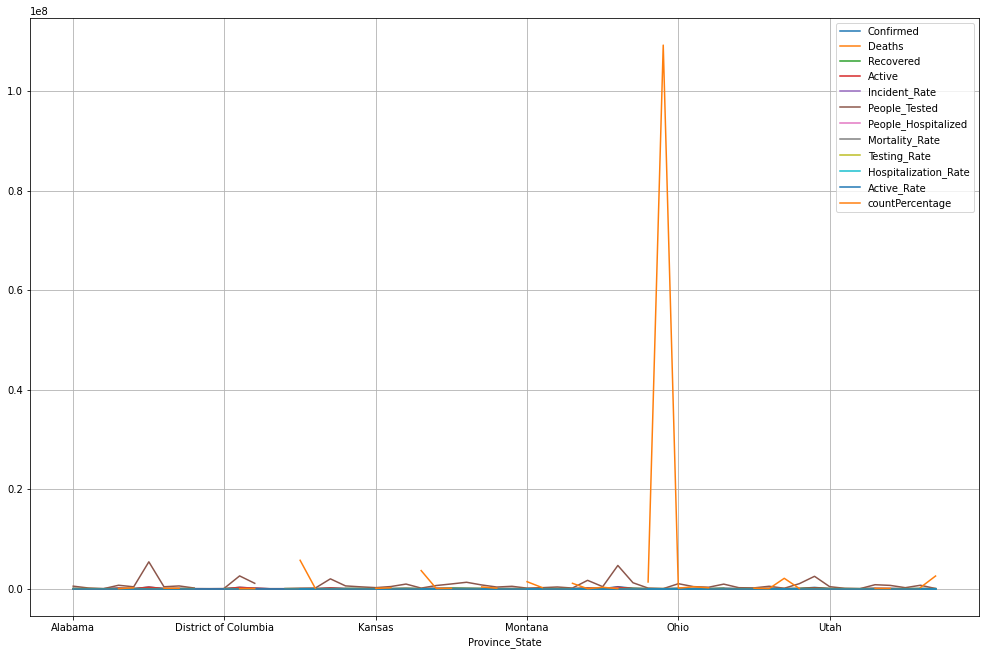

In [13]:
# Exact count permissive values available for dataSets

recoveryRate = analysisData.loc[:, abstractParam[1]] - analysisData.loc[:, abstractParam[0]]
countPercentage = round(recoveryRate/analysisData.loc[:, abstractParam[2]]*100, 3)
analysisData["countPercentage"] = countPercentage

# making in-out data analysis spectrum

spectrum = analysisData.set_index("Province_State").plot(figsize=(17, 11), grid=True)
print(spectrum)
analysisData



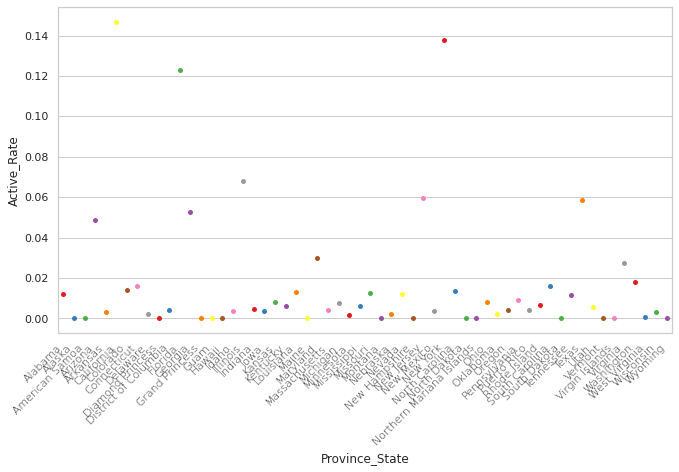

In [14]:
# Visualization of achieved data

plt.figure(figsize=(11,6))
sns.set(style="whitegrid")
chart = sns.swarmplot(x="Province_State", y="Active_Rate", palette='Set1', data=analysisData)
#type(chart) # checking the object class for the graph
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light' )
plt.show()

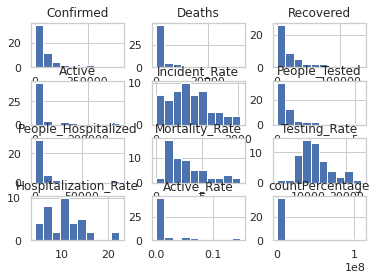

In [15]:
analysisData.hist()
plt.show()

In [21]:
# Mean space normalised Data

normalizedData = round((analysisData - analysisData.mean())/analysisData.std(), 2)
#print(normalizedData)

# Min-Max space normalised Data for analysis

normalized_df = pd.DataFrame(analysisData.loc[:, ["Confirmed", "Deaths", "Recovered", "Active", "Incident_Rate", "People_Tested", "People_Hospitalized"]])
minMaxNormalize = round((normalized_df - normalized_df.min())/(normalized_df.max()-normalized_df.min()), 3)
print(minMaxNormalize)


    Confirmed  Deaths  Recovered  Active  Incident_Rate  People_Tested  \
0       0.133   0.035      0.194   0.084          0.529          0.094   
1       0.004   0.001      0.004   0.003          0.098          0.027   
2       0.000   0.000        NaN   0.000          0.000          0.000   
3       0.305   0.069      0.112   0.332          0.815          0.129   
4       0.071   0.010      0.163   0.020          0.455          0.071   
..        ...     ...        ...     ...            ...            ...   
53      0.176   0.061      0.070   0.187          0.401          0.149   
54      0.101   0.044        NaN   0.124          0.259          0.124   
55      0.011   0.003      0.021   0.004          0.115          0.038   
56      0.091   0.025      0.213   0.023          0.303          0.128   
57      0.005   0.001      0.010   0.001          0.156          0.007   

    People_Hospitalized  
0                 0.075  
1                   NaN  
2                   NaN  
3      

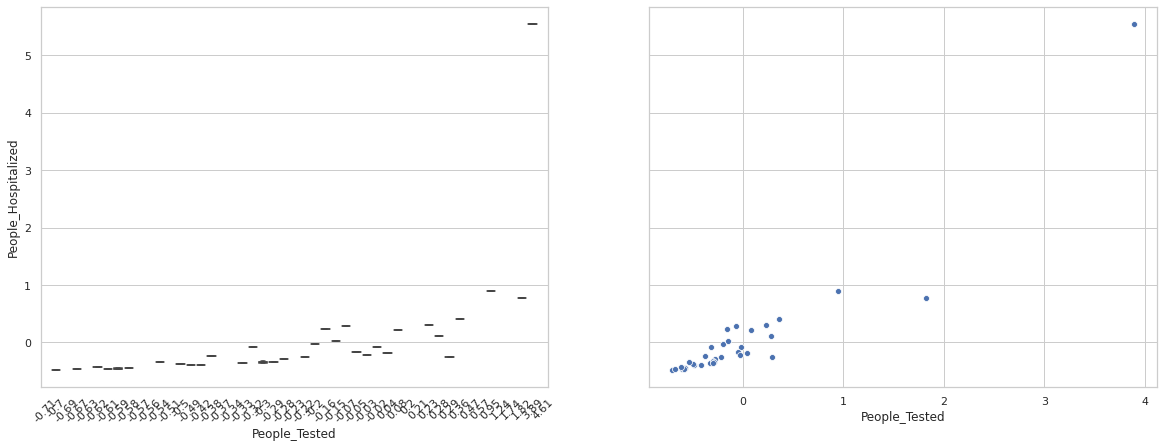

In [17]:

_, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 7))

# visualing the trends for people hospitalized to people tested over Mean Space

snsPlot = sns.boxplot(x="People_Tested", y="People_Hospitalized", data=normalizedData, ax=axes[0])
snsPlot.set_xticklabels(snsPlot.get_xticklabels(), rotation=45)
sns.scatterplot(x="People_Tested", y="People_Hospitalized", data=normalizedData, ax=axes[1])
plt.show()


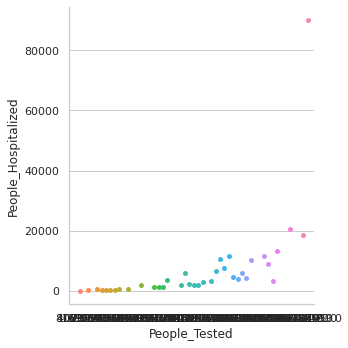

In [108]:
# visualing the trends for people hospitalized to people tested over MinMax Space

sns.catplot(x="People_Tested", y="People_Hospitalized", data=normalized_df,
            kind="swarm")


In [22]:
# Analysis of csseData

print(fipsDB.shape)
print(list(fipsDB))

fipsDB

(3813, 14)
['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio']


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-13 04:43:04,34.223334,-82.461707,153,1,0,152.0,"Abbeville, South Carolina, US",623.802340,0.653595
1,22001.0,Acadia,Louisiana,US,2020-07-13 04:43:04,30.295065,-92.414197,1339,45,0,1294.0,"Acadia, Louisiana, US",2158.111048,3.360717
2,51001.0,Accomack,Virginia,US,2020-07-13 04:43:04,37.767072,-75.632346,1042,14,0,1028.0,"Accomack, Virginia, US",3224.408962,1.343570
3,16001.0,Ada,Idaho,US,2020-07-13 04:43:04,43.452658,-116.241552,4146,25,0,4121.0,"Ada, Idaho, US",860.903637,0.602991
4,19001.0,Adair,Iowa,US,2020-07-13 04:43:04,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808,NaN,NaN,NaN,Yemen,2020-07-13 04:43:04,15.552727,48.516388,1465,417,659,389.0,Yemen,4.911827,28.464164
3809,NaN,NaN,NaN,Zambia,2020-07-13 04:43:04,-13.133897,27.849332,1895,42,1412,441.0,Zambia,10.307901,2.216359
3810,NaN,NaN,NaN,Zimbabwe,2020-07-13 04:43:04,-19.015438,29.154857,985,18,328,639.0,Zimbabwe,6.627228,1.827411
3811,16061.0,Lewis,Idaho,US,2020-07-10 02:34:22,46.233153,-116.434146,1,0,0,1.0,"Lewis, Idaho, US",26.055237,0.000000


In [31]:
fipsDB = fipsDB.drop(['Admin2', 'Last_Update','Lat', 'Long_', "ISO3"], axis=1)
provinceDB.info


KeyError: "['Admin2' 'Last_Update' 'Lat' 'Long_' 'ISO3'] not found in axis"

In [32]:
# missing dataPercentage for different dataFrames

missing_dataPercentage(fipsDB)


,nullTotal,nullPercentage
FIPS,682,17.89
Province_State,169,4.43
Incidence_Rate,74,1.94
Case-Fatality_Ratio,51,1.34
Active,4,0.10
Combined_Key,0,0.00
Recovered,0,0.00
Deaths,0,0.00
Confirmed,0,0.00
Country_Region,0,0.00


In [25]:
# Percentage count for unique region report

def percentValueCounts(dataframe, feature):
    countPercent = pd.DataFrame(round(dataframe.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    countTotal = pd.DataFrame(dataframe.loc[:,feature].value_counts(dropna=False))
    
    countTotal.columns = ["Total"]
    countPercent.columns = ['Percent']
    return pd.concat([countTotal, countPercent], axis = 1)


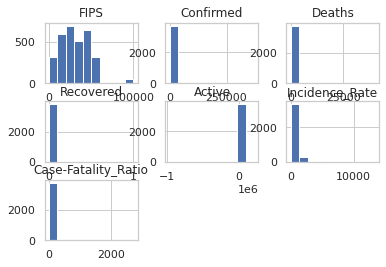

            Total  Percent
US           3142    82.40
Russia         83     2.18
Japan          48     1.26
India          36     0.94
Colombia       34     0.89
...           ...      ...
Cabo Verde      1     0.03
Chad            1     0.03
Cambodia        1     0.03
Qatar           1     0.03
Mali            1     0.03

[188 rows x 2 columns]


In [28]:
# Analyse the region report

regionPercentage = percentValueCounts(fipsDB, 'Country_Region')
fipsDB.hist()
plt.show()
print(regionPercentage)


/home/nikkhil/.local/share/virtualenvs/task2Assign-D6j1G1lU/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


AxesSubplot(0.125,0.125;0.775x0.755)


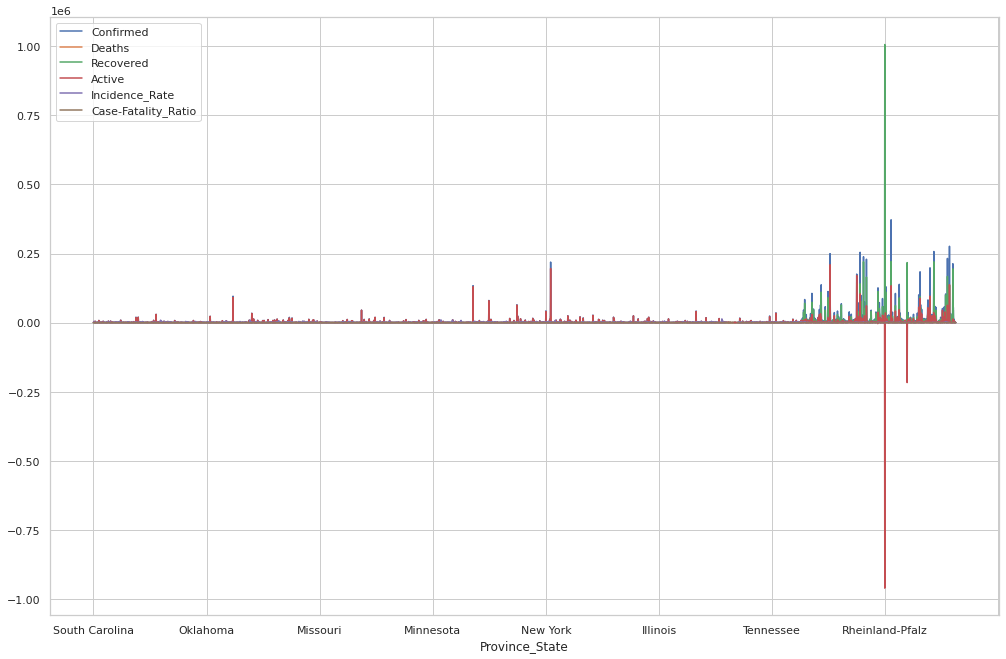

In [34]:
# spectrum visualisation for clean and non-static distribution
visualData = fipsDB.drop("FIPS", axis=1)
spectrum = visualData.set_index("Province_State").plot(figsize=(17, 11), grid=True)
print(spectrum)


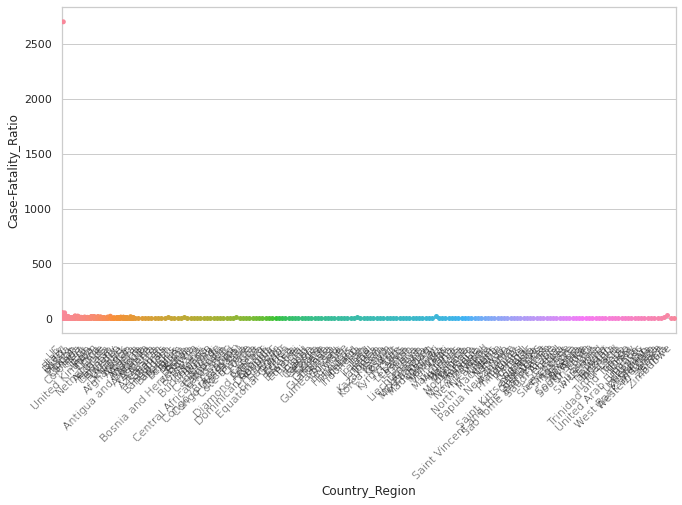

In [38]:
# Visualization of achieved data
# there seems to sort of data redundancy but for sure try to improve frame-readablility --- Pending

plt.figure(figsize=(11,6))
sns.set(style="whitegrid")
chart = sns.swarmplot(x="Country_Region", y="Case-Fatality_Ratio", data=fipsDB)
#type(chart) # checking the object class for the graph
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light' )
plt.show()


In [140]:
# Mean space normalised Data

normalizedData = round((fipsDB - fipsDB.mean())/fipsDB.std(), 2)
print(normalizedData)

# Min-Max space normalised Data for analysis

normalized_df = pd.DataFrame(fipsDB.loc[:, ["Confirmed", "Deaths", "Recovered", "Active", "Incidence_Rate", "Case-Fatality_Ratio"]])
minMaxNormalize = round((normalized_df - normalized_df.min())/(normalized_df.max()-normalized_df.min()), 3)
print(minMaxNormalize)


      Active  Case-Fatality_Ratio Combined_Key  Confirmed Country_Region  \
0      -0.07                -0.06          NaN      -0.19            NaN   
1      -0.00                -0.00          NaN      -0.12            NaN   
2      -0.02                -0.05          NaN      -0.14            NaN   
3       0.15                -0.06          NaN       0.04            NaN   
4      -0.08                -0.08          NaN      -0.20            NaN   
...      ...                  ...          ...        ...            ...   
3808   -0.05                 0.57          NaN      -0.11            NaN   
3809   -0.05                -0.03          NaN      -0.09            NaN   
3810   -0.04                -0.04          NaN      -0.14            NaN   
3811   -0.08                -0.08          NaN      -0.20            NaN   
3812   -0.08                  NaN          NaN      -0.20            NaN   

      Deaths  FIPS  Incidence_Rate Province_State  Recovered  
0      -0.13  0.80      

In [ ]:
# visualing the trends for people hospitalized to people tested over MinMax Space

sns.catplot(x="Deaths", y="Active", data=normalized_df,
            kind="swarm")


In [152]:
# analysis of global death

print(confirmGlobDB.shape)
print(list(confirmGlobDB))

confirmGlobDB.head(10)


(266, 178)
['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/2

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,68,68,70,70,70,73,74,74,74,74
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,75376,77815,80447,83426,87030,90693,94060,97509,100166,103265
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,27900,28606,28936,29285,29820,30346,30903,31392,31969,32151
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,108,108,108,111,112,113,113,113,113,113
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,3419,3429,3433,3440,3453,3467,3474,3478,3492,3505


In [155]:
confirmGlobDB = confirmGlobDB.drop(['Lat', 'Long'], axis=1)
provinceDB.info


KeyError: "['Lat' 'Long'] not found in axis"

In [169]:
# missing dataPercentage for different dataFrames

isnullValue = confirmGlobDB.loc[:, "Province/State"].isnull().sum()
print(isnullValue)
missing_dataPercentage(confirmGlobDB)


185


,nullTotal,nullPercentage
Province/State,185,69.55
7/12/20,0,0.00
3/23/20,0,0.00
3/22/20,0,0.00
3/21/20,0,0.00
...,...,...
5/14/20,0,0.00
5/13/20,0,0.00
5/12/20,0,0.00
5/11/20,0,0.00


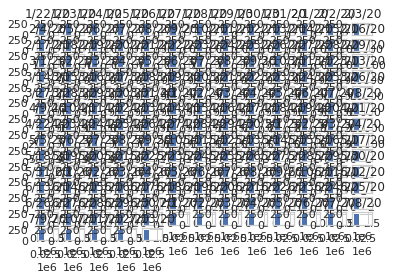

                                  Total  Percent
NaN                                 185    69.55
Bonaire, Sint Eustatius and Saba      1     0.38
Prince Edward Island                  1     0.38
Turks and Caicos Islands              1     0.38
British Virgin Islands                1     0.38
...                                 ...      ...
Australian Capital Territory          1     0.38
Northern Territory                    1     0.38
Guadeloupe                            1     0.38
Montserrat                            1     0.38
Sichuan                               1     0.38

[82 rows x 2 columns]


In [173]:
# Analyse the region report

regionPercentage = percentValueCounts(confirmGlobDB, 'Province/State')
confirmGlobDB.hist(bins=3)
plt.show()
print(regionPercentage)

# major deaths were registered in Bonaire, Sint Eustatius and Saba


In [184]:
# Mean space normalised Data

normalizedData = round((confirmGlobDB - confirmGlobDB.mean())/confirmGlobDB.std(), 2)
print(normalizedData)

print("*"*100)

# Min-Max space normalised Data for analysis
minMaxNormalize = round((normalizedData - normalizedData.min())/(normalizedData.max()-normalizedData.min()), 3)
print(minMaxNormalize)


     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0      -0.08    -0.09     -0.1    -0.11    -0.12    -0.12     -0.1    -0.11   
1      -0.08    -0.09     -0.1    -0.11    -0.12    -0.12     -0.1    -0.11   
2      -0.08    -0.09     -0.1    -0.11    -0.12    -0.12     -0.1    -0.11   
3      -0.08    -0.09     -0.1    -0.11    -0.12    -0.12     -0.1    -0.11   
4      -0.08    -0.09     -0.1    -0.11    -0.12    -0.12     -0.1    -0.11   
..       ...      ...      ...      ...      ...      ...      ...      ...   
261    -0.08    -0.09     -0.1    -0.11    -0.12    -0.12     -0.1    -0.11   
262    -0.08    -0.09     -0.1    -0.11    -0.12    -0.12     -0.1    -0.11   
263    -0.08    -0.09     -0.1    -0.11    -0.12    -0.12     -0.1    -0.11   
264    -0.08    -0.09     -0.1    -0.11    -0.12    -0.12     -0.1    -0.11   
265    -0.08    -0.09     -0.1    -0.11    -0.12    -0.12     -0.1    -0.11   

     1/30/20  1/31/20  ...  7/2/20  7/3/20  7/4/20 

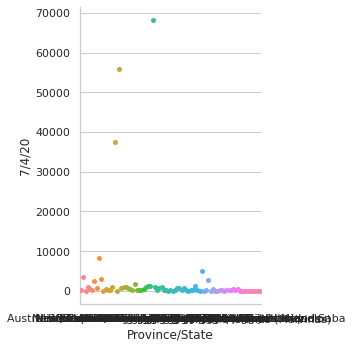

In [192]:
# visualing the trends for people hospitalized to people tested over MinMax Space

# individual learning analysis

sns.catplot(x="Province/State", y="7/4/20" , data=normalized_df,
            kind="swarm")
